In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab, mlab
import random
import re
%matplotlib inline

In [2]:
#Loading Housing Zhvi Price by state
census=pd.read_csv('../Data/State_Zhvi_AllHomes.csv')
census.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,9,California,1,157900.0,157800.0,157500.0,157300.0,157000.0,156800.0,156900.0,...,465900,468600,471700,474300,476700,480200,483700,486200,488300,490100
1,54,Texas,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,156800,158200,159600,160500,160900,161300,161800,162300,162800,163100
2,43,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,267800,268600,269400,270600,272300,274200,276200,278300,281200,283900
3,14,Florida,4,86300.0,86600.0,86700.0,86600.0,86500.0,86500.0,86400.0,...,188800,190800,192900,194500,196000,198100,200300,202200,203600,204500
4,21,Illinois,5,113900.0,114400.0,114500.0,113900.0,113100.0,112900.0,113000.0,...,161000,161900,162800,163400,163800,164500,164800,165600,167000,168100


In [3]:
#Droping Unwanted Columns from 1996 to 2008
columns_to_drop = list(range(1996,2008))
census= census[[col for col in census.columns if col[:4] not in str(columns_to_drop)]]
census.head()

,RegionID,RegionName,SizeRank,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,9,California,1,465900.0,456100.0,445700.0,435100.0,425100.0,415300.0,406000.0,...,465900,468600,471700,474300,476700,480200,483700,486200,488300,490100
1,54,Texas,2,133300.0,131900.0,130500.0,129300.0,128100.0,127100.0,126600.0,...,156800,158200,159600,160500,160900,161300,161800,162300,162800,163100
2,43,New York,3,327600.0,325900.0,324900.0,323300.0,320900.0,318200.0,316000.0,...,267800,268600,269400,270600,272300,274200,276200,278300,281200,283900
3,14,Florida,4,213200.0,208800.0,204400.0,200000.0,195900.0,192000.0,188000.0,...,188800,190800,192900,194500,196000,198100,200300,202200,203600,204500
4,21,Illinois,5,200200.0,199600.0,198300.0,197200.0,196100.0,194800.0,193600.0,...,161000,161900,162800,163400,163800,164500,164800,165600,167000,168100


In [4]:
gdp=pd.read_csv('../Data/GDP_State_Quaterly.csv',skiprows=4,error_bad_lines=False)
#Removing punctation from columns
gdp.columns=gdp.columns.map(lambda x: re.sub(r':', '', x))
#droping na
gdp.dropna(inplace=True)
columns_to_drop = list(range(2005,2008))
gdp= gdp[[col for col in gdp.columns if col[:4] not in str(columns_to_drop)]]

columnss=gdp.columns[2:]
columnss=columnss.tolist()

In [5]:
#Cleaning and Manipulating the data
census2=census[census.columns.values[3:]]
census2.head()

,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,465900.0,456100.0,445700.0,435100.0,425100.0,415300.0,406000.0,397000.0,388600.0,380700.0,...,465900,468600,471700,474300,476700,480200,483700,486200,488300,490100
1,133300.0,131900.0,130500.0,129300.0,128100.0,127100.0,126600.0,126800.0,127200.0,127600.0,...,156800,158200,159600,160500,160900,161300,161800,162300,162800,163100
2,327600.0,325900.0,324900.0,323300.0,320900.0,318200.0,316000.0,313900.0,312000.0,310100.0,...,267800,268600,269400,270600,272300,274200,276200,278300,281200,283900
3,213200.0,208800.0,204400.0,200000.0,195900.0,192000.0,188000.0,184200.0,180500.0,176700.0,...,188800,190800,192900,194500,196000,198100,200300,202200,203600,204500
4,200200.0,199600.0,198300.0,197200.0,196100.0,194800.0,193600.0,192700.0,191600.0,190400.0,...,161000,161900,162800,163400,163800,164500,164800,165600,167000,168100


In [6]:
year=list(range(2008,2017))
#Converting my data into quaters period
census1=census2.groupby(pd.PeriodIndex(census2.columns, freq='Q'), axis=1).mean()
#Here the manipulated data into Quaters.
census1.head()

,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,...,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1
0,455900.000000,425166.666667,397200.000000,373333.333333,358433.333333,345600.000000,336466.666667,332966.666667,337566.666667,337766.666667,...,422733.333333,427800.000000,435233.333333,443033.333333,451366.666667,458533.333333,466233.333333,474233.333333,483366.666667,489200.0
1,131900.000000,128166.666667,126866.666667,128133.333333,130666.666667,132133.333333,133100.000000,132333.333333,126366.666667,125666.666667,...,137700.000000,140066.666667,143566.666667,146933.333333,149700.000000,153200.000000,156866.666667,160333.333333,161800.000000,162950.0
2,326133.333333,320800.000000,313966.666667,306766.666667,280300.000000,274400.000000,269966.666667,267833.333333,269600.000000,265700.000000,...,254066.666667,255233.333333,257366.666667,259533.333333,262200.000000,265066.666667,267800.000000,270766.666667,276233.333333,282550.0
3,208800.000000,195966.666667,184233.333333,172833.333333,165433.333333,157800.000000,151433.333333,147666.666667,145800.000000,142500.000000,...,164466.666667,167466.666667,171700.000000,176266.666667,180966.666667,185000.000000,189033.333333,194466.666667,200200.000000,204050.0
4,199366.666667,196033.333333,192633.333333,189033.333333,184733.333333,179933.333333,175366.666667,172600.000000,167866.666667,164900.000000,...,152300.000000,152933.333333,154566.666667,156033.333333,157266.666667,158966.666667,161100.000000,163333.333333,164966.666667,167550.0


In [7]:
#Taking only 3 rows for the census dataframe
census=census[['RegionID','RegionName','SizeRank']]
census=census.join(census1)
census.head()
census.columns=census.columns.astype(str)
census.head()

,RegionID,RegionName,SizeRank,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,...,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1
0,9,California,1,455900.000000,425166.666667,397200.000000,373333.333333,358433.333333,345600.000000,336466.666667,...,422733.333333,427800.000000,435233.333333,443033.333333,451366.666667,458533.333333,466233.333333,474233.333333,483366.666667,489200.0
1,54,Texas,2,131900.000000,128166.666667,126866.666667,128133.333333,130666.666667,132133.333333,133100.000000,...,137700.000000,140066.666667,143566.666667,146933.333333,149700.000000,153200.000000,156866.666667,160333.333333,161800.000000,162950.0
2,43,New York,3,326133.333333,320800.000000,313966.666667,306766.666667,280300.000000,274400.000000,269966.666667,...,254066.666667,255233.333333,257366.666667,259533.333333,262200.000000,265066.666667,267800.000000,270766.666667,276233.333333,282550.0
3,14,Florida,4,208800.000000,195966.666667,184233.333333,172833.333333,165433.333333,157800.000000,151433.333333,...,164466.666667,167466.666667,171700.000000,176266.666667,180966.666667,185000.000000,189033.333333,194466.666667,200200.000000,204050.0
4,21,Illinois,5,199366.666667,196033.333333,192633.333333,189033.333333,184733.333333,179933.333333,175366.666667,...,152300.000000,152933.333333,154566.666667,156033.333333,157266.666667,158966.666667,161100.000000,163333.333333,164966.666667,167550.0


In [8]:
census_pivot=pd.melt(census,id_vars=['RegionName'],value_vars=columnss,var_name='Quater',value_name='Median_Price')
census_pivot=census_pivot.groupby(['RegionName','Quater'],).mean()
census_pivot.head()

Median_Price
RegionName Quater               
Alabama    2008Q1  128333.333333
           2008Q2  128033.333333
           2008Q3  128566.666667
           2008Q4  127566.666667
           2009Q1  131900.000000

In [9]:
census_pivot=census_pivot.unstack(level=0)
#Changing row and column data from the data base
census_pivot.head()

Median_Price                                               \
RegionName        Alabama         Alaska        Arizona       Arkansas   
Quater                                                                   
2008Q1      128333.333333  272300.000000  227300.000000  105400.000000   
2008Q2      128033.333333  277233.333333  216233.333333  104966.666667   
2008Q3      128566.666667  275166.666667  206166.666667  104633.333333   
2008Q4      127566.666667  268033.333333  196833.333333  104033.333333   
2009Q1      131900.000000  263400.000000  192833.333333  104866.666667   

                                                                        \
RegionName     California       Colorado    Connecticut       Delaware   
Quater                                                                   
2008Q1      455900.000000  223233.333333  282433.333333  229066.666667   
2008Q2      425166.666667  221366.666667  278200.000000  224433.333333   
2008Q3      397200.000000  220600.000000  274000.000000  220600.000000   
2008Q4      373333.333333  217666.666667  269833.333333  217166.666667   
2009Q1      358433.333333  214466.666667  264633.333333  218033.333333   

                                                ...                 \
RegionName District of Columbia        Florida  ... South Carolina   
Quater                                          ...                  
2008Q1            383966.666667  208800.000000  ...  133633.333333   
2008Q2            376633.333333  195966.666667  ...  132466.666667   
2008Q3            369466.666667  184233.333333  ...  131366.666667   
2008Q4            361966.666667  172833.333333  ...  130366.666667   
2009Q1            355000.000000  165433.333333  ...  133266.666667   

                                                                        \
RegionName   South Dakota      Tennessee          Texas           Utah   
Quater                                                                   
2008Q1      143033.333333  120233.333333  131900.000000  258966.666667   
2008Q2      144833.333333  119700.000000  128166.666667  254700.000000   
2008Q3      145066.666667  119166.666667  126866.666667  251733.333333   
2008Q4      144766.666667  117966.666667  128133.333333  249533.333333   
2009Q1      146033.333333  119233.333333  130666.666667  249400.000000   

                                                                       \
RegionName       Virginia     Washington West Virginia      Wisconsin   
Quater                                                                  
2008Q1      256500.000000  295733.333333           NaN  157766.666667   
2008Q2      249966.666667  290266.666667           NaN  156933.333333   
2008Q3      243066.666667  284400.000000           NaN  155566.666667   
2008Q4      236600.000000  277200.000000           NaN  154366.666667   
2009Q1      231666.666667  271033.333333           NaN  156233.333333   

                           
RegionName        Wyoming  
Quater                     
2008Q1      191500.000000  
2008Q2      190800.000000  
2008Q3      193066.666667  
2008Q4      199966.666667  
2009Q1      206100.000000  

[5 rows x 49 columns]

In [10]:
#After Cleaning Data
gdp.head()

,Fips,Area,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,...,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3
0,00000,United States,14578856.0,14722003.0,14750202.0,14455348.0,14287426.0,14242156.0,14284750.0,14466139.0,...,17170221.0,17453741.0,17576210.0,17667380.0,17881439.0,18024665.0,18105113.0,18163446.0,18331223.0,18555365.0
1,01000,Alabama,171941.0,174068.0,174268.0,170307.0,168708.0,167954.0,168176.0,168420.0,...,193305.0,196888.0,197070.0,197479.0,199018.0,200942.0,201185.0,202474.0,204120.0,206360.0
2,02000,Alaska,52981.0,56566.0,58266.0,54032.0,51403.0,50044.0,49377.0,51027.0,...,58756.0,58294.0,56961.0,53364.0,53915.0,52493.0,51216.0,50008.0,50961.0,51541.0
3,04000,Arizona,261073.0,258886.0,256740.0,250176.0,245502.0,240962.0,239957.0,243615.0,...,278025.0,282966.0,283856.0,286045.0,289694.0,292221.0,295652.0,296101.0,299809.0,303007.0
4,05000,Arkansas,98133.0,100673.0,101098.0,99447.0,99848.0,96214.0,97177.0,98842.0,...,117503.0,118454.0,119357.0,116930.0,118707.0,119997.0,119994.0,121167.0,122230.0,123100.0


In [12]:
gdp12=pd.melt(gdp,id_vars=['Area'],value_vars=columnss,var_name='Quater',value_name='Gdp')
#unstacking and transfering column and rows making gdp and housing dataframe row and column
gdp12.head()

,Area,Quater,Gdp
0,United States,2008Q1,14578856.0
1,Alabama,2008Q1,171941.0
2,Alaska,2008Q1,52981.0
3,Arizona,2008Q1,261073.0
4,Arkansas,2008Q1,98133.0


In [13]:
gdp12.groupby(['Area','Quater'],).mean()

Gdp
Area    Quater          
Alabama 2008Q1  171941.0
        2008Q2  174068.0
        2008Q3  174268.0
        2008Q4  170307.0
        2009Q1  168708.0
...                  ...
Wyoming 2015Q3   40094.0
        2015Q4   38493.0
        2016Q1   36567.0
        2016Q2   37125.0
        2016Q3   37641.0

[2100 rows x 1 columns]

In [14]:
gdp12=gdp12.groupby(['Area','Quater'],).mean()
gdp12=gdp12.unstack(['Area'])
gdp12.head()

Gdp                                                    \
Area     Alabama   Alaska   Arizona  Arkansas California  Colorado   
Quater                                                               
2008Q1  171941.0  52981.0  261073.0   98133.0  1969526.0  251670.0   
2008Q2  174068.0  56566.0  258886.0  100673.0  2005086.0  257595.0   
2008Q3  174268.0  58266.0  256740.0  101098.0  2012734.0  258669.0   
2008Q4  170307.0  54032.0  250176.0   99447.0  1948359.0  251202.0   
2009Q1  168708.0  51403.0  245502.0   99848.0  1938823.0  248909.0   

                                                             ...            \
Area   Connecticut Delaware District of Columbia   Far West  ... Tennessee   
Quater                                                       ...             
2008Q1    245831.0  55235.0              97179.0  2748667.0  ...  247120.0   
2008Q2    241824.0  55391.0              97131.0  2793293.0  ...  249112.0   
2008Q3    238626.0  55363.0              97553.0  2807914.0  ...  251747.0   
2008Q4    226564.0  55183.0              97624.0  2728475.0  ...  248228.0   
2009Q1    232647.0  57175.0              97631.0  2707765.0  ...  246995.0   

                                                                         \
Area        Texas United States      Utah  Vermont  Virginia Washington   
Quater                                                                    
2008Q1  1225303.0    14578856.0  115801.0  25449.0  393133.0   351572.0   
2008Q2  1263327.0    14722003.0  117648.0  25367.0  398102.0   354579.0   
2008Q3  1266615.0    14750202.0  117178.0  25545.0  402529.0   358032.0   
2008Q4  1218304.0    14455348.0  113841.0  25505.0  401503.0   352657.0   
2009Q1  1170166.0    14287426.0  114228.0  25273.0  403278.0   347681.0   

                                         
Area   West Virginia Wisconsin  Wyoming  
Quater                                   
2008Q1       59696.0  244095.0  40473.0  
2008Q2       62439.0  244280.0  44313.0  
2008Q3       64145.0  245581.0  44985.0  
2008Q4       64045.0  244229.0  41716.0  
2009Q1       63866.0  240702.0  39163.0  

[5 rows x 60 columns]

In [15]:
def gdpmedian(state):
    z=gdp12['Gdp'][state].plot(figsize=(10,4),color='r',label='GDP',title="GDP VS Median Price of {} ".format(state))
    z.set_xlabel('Month By Quater')
    z.set_ylabel('GDP {}'.format(state))

    ax2=z.twinx()
    ax2.plot(census_pivot['Median_Price'][state],color='g' ,label = 'MedianPrice')

    ax2.set_ylabel('Median House Price {}'.format(state))
    z.legend(loc=2)
    ax2.legend(loc=1)

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


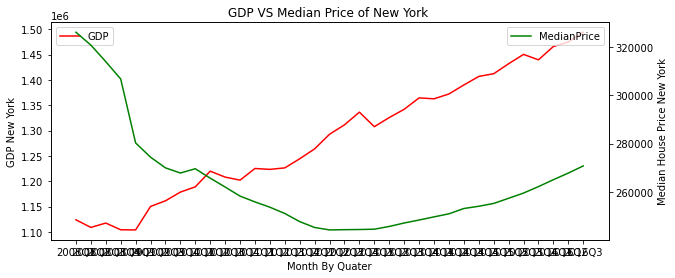

In [16]:
gdpmedian('New York')

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


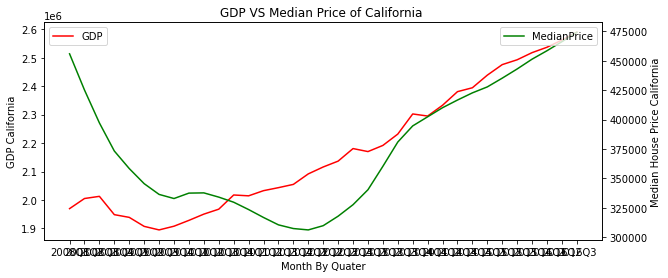

In [17]:
gdpmedian('California')

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


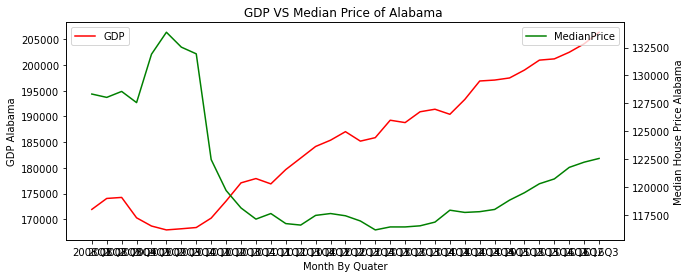

In [18]:
gdpmedian('Alabama')

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


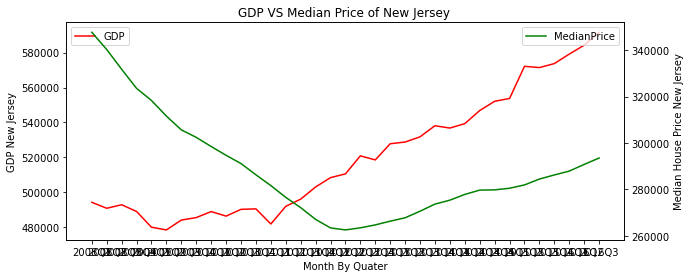

In [19]:
gdpmedian('New Jersey')